<a href="https://colab.research.google.com/github/Meyssemmedini/PRODIGY_DS_02/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#data mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
# Import  packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
#read data
df= pd.read_csv('/content/drive/MyDrive/virtual intern/Prodigy Infotech/datasets/train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Count the number of duplicate rows in  DataFrame.
df.duplicated().sum()

0

In [6]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket']

# Drop specified columns
df = df.drop(columns=columns_to_drop)

In [7]:
#identifiying the missing data
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
#checking the % of missing val in each feature
(df.isna().sum() / len(df) * 100)[df.isna().sum() > 0]

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

we are going to drop column 'Cabin' due to the large % of missing values

In [9]:
# Drop column 'Cabin'
df.drop(columns='Cabin', inplace = True)

we are going to impute the 'age' using the median and the mode for the the 'Embarked'

In [10]:
#filling the missing values
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [12]:
#checking for any remaining missing val in each feature
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
#checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


all data types looks correct according to the dict

In [14]:
# checking for inconsistent values in categorical columns
# Displaying value counts for each categorical column to check inconsistent values
for column in df.select_dtypes(include='object').columns:
    print(f'Value counts for {column}:')
    print(df[column].value_counts())
    print('\n')

Value counts for Sex:
male      577
female    314
Name: Sex, dtype: int64


Value counts for Embarked:
S    646
C    168
Q     77
Name: Embarked, dtype: int64




In [15]:
#checking for impossible values in numeric columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


age can't be 0.42 or 0.67....

In [27]:
df['Age']=df['Age'].replace({0.42:42,
                             0.67:67,
                             0.75:75,
                             0.83:83,
                             0.92:92})

<ipython-input-44-c85611065228>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



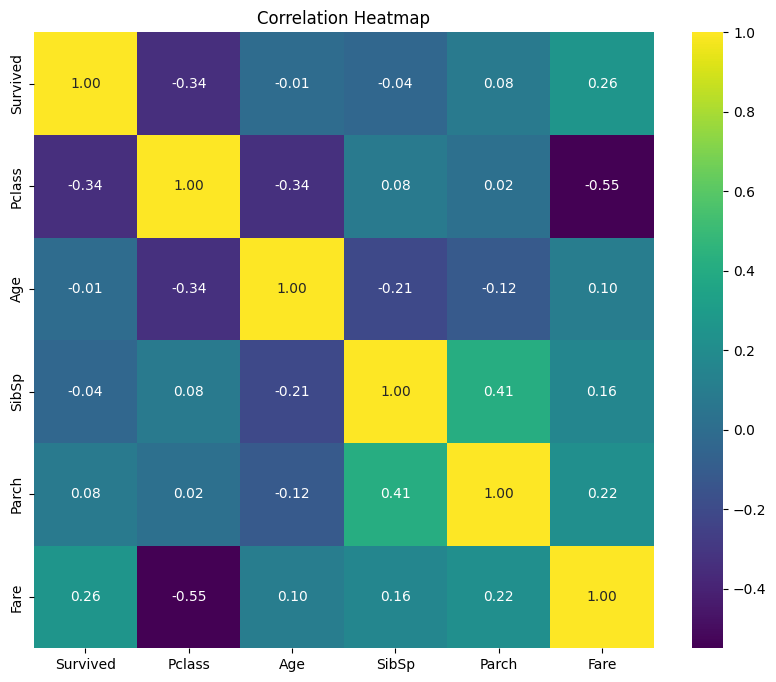

In [44]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Calculate correlation coefficients
correlation_survived = df.corr()['Survived'].drop('Survived')

# Create a bar plot
fig = px.bar(x=correlation_survived.index, y=correlation_survived.values,
             labels={'x': 'Features', 'y': 'Correlation with Survived'},
             title='Correlation between Survived and Other Features',
             color=correlation_survived.values, color_continuous_scale='Viridis');

fig.update_layout(coloraxis_colorbar=dict(title='Correlation'))
fig.show()


<ipython-input-37-2a67f7e93088>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



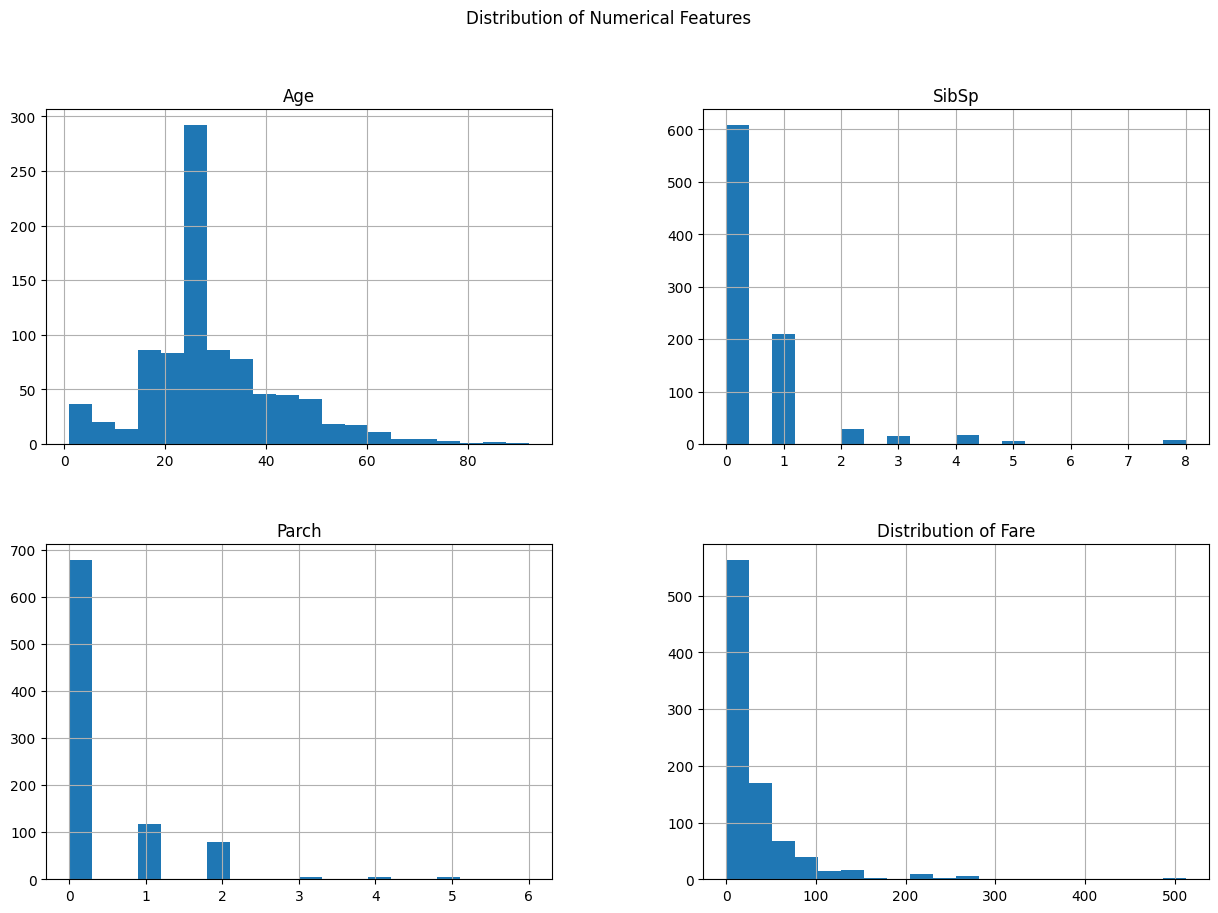

In [47]:
# Distribution of numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.title(f'Distribution of {feature}')
plt.suptitle('Distribution of Numerical Features')
plt.show()

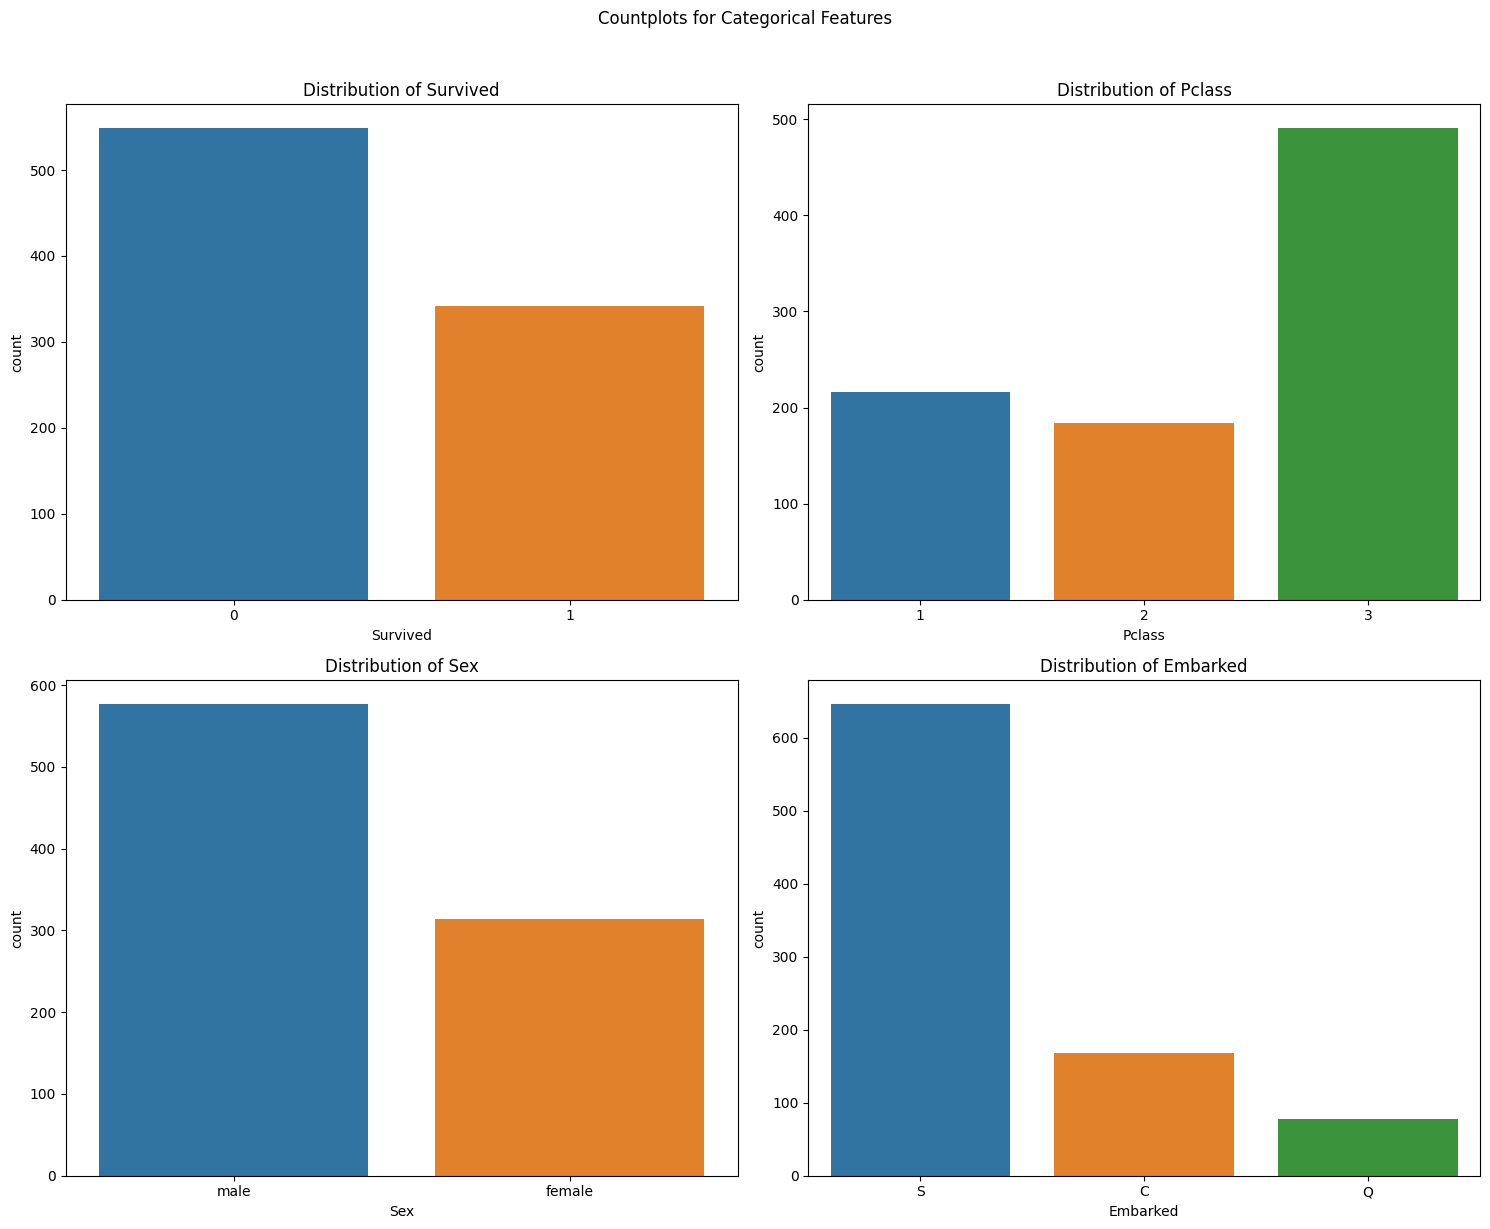

In [49]:
# Countplot for categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
fig = plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')

plt.suptitle('Countplots for Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

In [64]:
# Survival rate by Pclass and Sex with annotations
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
fig = px.bar(survival_rate, x='Pclass', y='Survived', color='Sex',barmode='group',
             title='Survival Rate by Pclass and Sex',
             labels={'Survived': 'Survival Rate', 'Pclass': 'Passenger Class'},
             text='Survived')
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(yaxis_ticksuffix='%')
fig.show()


In [63]:
#barplot for survival count by Port of Embarkation
fig = px.histogram(df, x='Embarked', color='Survived', title='Survival Count by Port of Embarkation',barmode='group',
             labels={'Embarked': 'Port of Embarkation', 'Survived': 'Survival'},
             color_discrete_map={0: 'lightcoral', 1: 'lightgreen'})

fig.update_layout(showlegend=True)
fig


In [56]:
# Boxplot for Age by Pclass using Plotly Express
fig = px.box(df, x='Pclass', y='Age', title='Boxplot of Age by Pclass')
fig.update_layout(yaxis_title="Age")
fig.show()